# Question-1


In [1]:
import numpy as np
import cv2
from google.colab.patches import cv2_imshow
import math
import matplotlib.pyplot as plt
from matplotlib.colors import ColorConverter
import math

In [2]:
def awgn(r,v):   #define a function for Adittive White Gaussian Noise
    if r.ndim == 2:  #for grayscale Image
      n = np.random.normal(0,v,(r.shape[0],r.shape[1]))    #Created random normal distribution array for noise addition 
      r = r + n
    if r.ndim == 3:  #for color Image
      blue,green,red = cv2.split(r)   #splitting all the three channels (cv2 images have bgr instead of rgb)
      n = np.random.normal(0,v,(r.shape[0],r.shape[1]))  #Created random normal distribution arrayfor noise addition 
      #adding noise to each color channel 
      red = red + n 
      green = green + n
      blue = blue + n
      #merging each color channel to make image
      r = cv2.merge([blue,green,red])
    return r

In [3]:
#Function testing
image = cv2.imread("/content/drive/MyDrive/EE610-Assignments/Assignment3/IMG-20220728-WA0040.jpg",0)  #grayscale image example
imagec = cv2.imread("/content/drive/MyDrive/EE610-Assignments/Assignment3/IMG-20220728-WA0040.jpg")   #color image example
noisy = cv2.imread("/content/drive/MyDrive/EE610-Assignments/Assignment3/noisy.jpg",0)

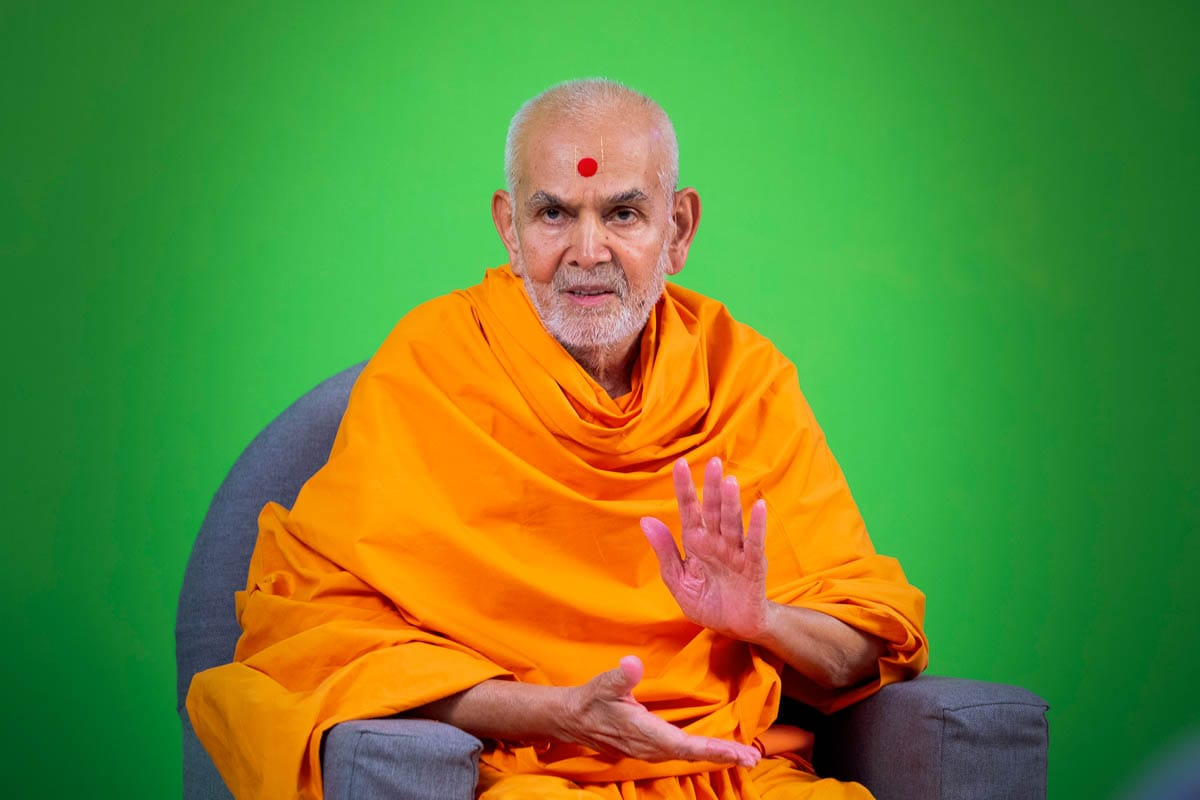

In [4]:
cv2_imshow(imagec)

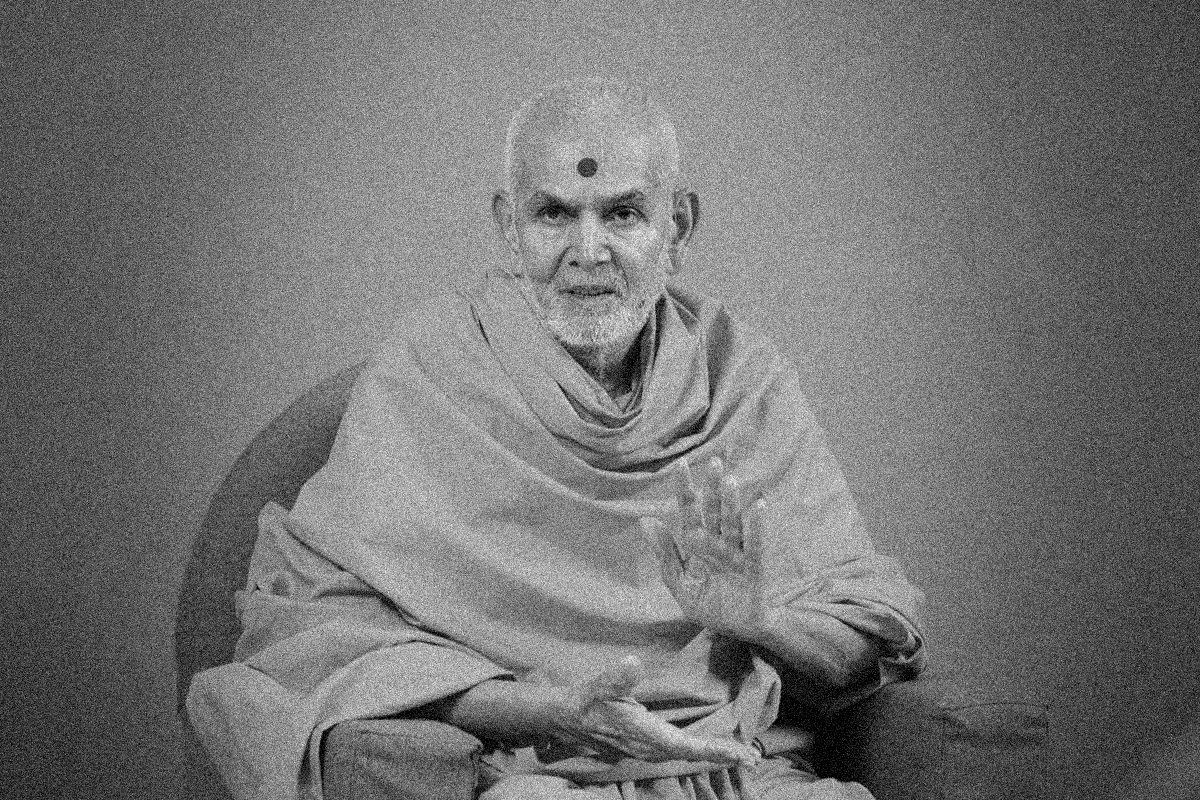

In [5]:
cv2_imshow(awgn(image,20))  #application of awgn function

In [6]:
cv2_imshow(awgn(imagec,20))   #application of awgn in color image

Output hidden; open in https://colab.research.google.com to view.

In [7]:
def mse(imageA, imageB):
    # the 'Mean Squared Error' between the two images is the
    # sum of the squared difference between the two images;
    # NOTE: the two images must have the same dimension
    err = np.sum((imageA.astype("float") - imageB.astype("float"))**2)
    err /= float(imageA.shape[0] * imageA.shape[1])	
    # return the MSE, the lower the error, the more "similar"
    # the two images are
    return err

def psnr(gt,rs):   
    psnr = 20*math.log10(255/math.sqrt(mse(gt,rs)))    #implemented formula of psnr, where 255 is MAX
    return psnr 
   

In [8]:
psnr(awgn(imagec,20),imagec)

17.350191155037095

In [9]:
def ssim(gr,rs,p=1,q=1,r=1):  #gr = image1 ... rs = image2 ... p,q,r is powers of luminence, contrast and structure
   mux = gr.mean()  #mean of gr image
   muy = rs.mean()  #mean of rs image
   sigx = gr.std()  #standard deviation of gr image
   sigy = rs.std()  #standard deviation of gr image
   if gr.ndim == 2:
       sigxy = np.cov(gr,rs)[1][0]   #covariance between image gr and rs
   if gr.ndim == 3:
       gr1 = np.mean(gr, axis=2)
       rs1 = np.mean(rs, axis=2)
       sigxy = np.cov(gr1,rs1)[1][0]
   c1 = (0.01*255)**2    # constant c1
   c2 = (0.03*255)**2    # constant c2
   c3 = c2/2             # constant c3

  
   l = (2*mux*muy + c1)/(mux**2 + muy**2 + c1)   #Implemented formula of Luminence
   c = (2*sigx*sigy + c2)/(sigx**2 + sigy**2 +c2) #Implemented formula of contrast
   s = (sigxy + c3)/(sigx*sigy + c3)  #Implemented formula of structure

   ssim = (l**p)*(c**q)*(s**r)   #Implemented formula of SSIM
   return ssim


In [10]:
ssim(image,awgn(image,20))

0.4144513728524696

In [11]:

def glpf(f,variance):
 
  # Create Gaussin Filter: Low Pass Filter   
  M,N = f.shape[0],f.shape[1]   #extracting dimentions of image array to make gaussian filter
  H = np.zeros((M,N), dtype=np.float32)  #initiated with zeros
  D0 = variance   #Diameter is the variance of normal distribution
  #Using for loop filling the array with gaussian function values 
  for u in range(M):
      for v in range(N):
          D = np.sqrt((u-M/2)**2 + (v-N/2)**2)  #implemented gaussian function
          H[u,v] = np.exp(-D**2/(2*D0*D0))      #gausssian function

 
 #For Grayscale Images
  if f.ndim == 2 :   
      # plt.figure(figsize=(5,5))
      # plt.imshow(f,cmap = "gray")
      # plt.axis('off')
      # plt.title("Original Image")
      # plt.show()
      
      # transform the image into frequency domain, f --> F
      F = np.fft.fft2(f)      
      Fshift = np.fft.fftshift(F)   #Shifting the fft to show in centre
      
      #plotting Gaussian Lowpass Filter
      # plt.figure(figsize=(5,5))
      # plt.imshow(H, cmap='gray')
      # plt.axis('off')
      # plt.title("Gaussian Low-pass filter")
      # plt.show()

      # Image Filters
      Gshift = Fshift * H   #Convolution is multiplication in frequency domain  
      G = np.fft.ifftshift(Gshift)   #inverse shift to original position 
      g = np.abs(np.fft.ifft2(G))    #Inverse furior transform 
      
      #Plotting The Output Image
      # plt.figure(figsize=(5,5))
      # plt.imshow(g, cmap='gray')
      # plt.axis('off')
      # plt.title("Output Image")
      # plt.show()
      return g


  #For Color Images
  if f.ndim == 3 :
     final = []   #intiated to store output RGB Channels of image
     [b,g,r] = cv2.split(f)    #image split to bgr channels
     
     #Plotting Original Image
    #  plt.figure(figsize=(5,5))
    #  plt.imshow(cv2.cvtColor(f, cv2.COLOR_BGR2RGB))   #converted to RGB to plot in matplotlib
    #  plt.axis('off')
    #  plt.title("Input Image")
    #  plt.show()

     
     for f in [b,g,r]:
        # transform the image into frequency domain, f --> F
        F = np.fft.fft2(f)      
        Fshift = np.fft.fftshift(F)   #Shifting the fft to show in centre

        # Image Filters
        Gshift = Fshift * H   #Convolution is multiplication in frequency domain  
        G = np.fft.ifftshift(Gshift)   #inverse shift to original position 
        g = np.abs(np.fft.ifft2(G))    #Inverse furior transform

        final.append(g)   #adding to create final image

     #Plotting GLPF 
    #  plt.figure(figsize=(5,5))
    #  plt.imshow(H, cmap='gray')
    #  plt.axis('off')
    #  plt.title("Gaussian Low-pass filter")
    #  plt.show()
     

     final_display = cv2.merge(final).astype('uint8')  #Merging the Image with uint8 to scale data in form of integers from 0-255
    #  plt.figure(figsize=(5,5))
    #  plt.imshow(cv2.cvtColor(final_display, cv2.COLOR_BGR2RGB))   #converted to RGB to plot in matplotlib
    #  plt.axis('off')
    #  plt.title("Output Image")
    #  plt.show()

     return final_display




In [12]:
glpf(imagec,25)

array([[[50, 90, 27],
        [48, 91, 26],
        [46, 91, 25],
        ...,
        [55, 89, 30],
        [53, 89, 29],
        [51, 90, 28]],

       [[48, 93, 27],
        [46, 93, 26],
        [45, 94, 26],
        ...,
        [52, 91, 29],
        [50, 92, 28],
        [49, 92, 28]],

       [[46, 95, 27],
        [45, 95, 27],
        [44, 96, 26],
        ...,
        [49, 93, 29],
        [48, 94, 28],
        [47, 94, 28]],

       ...,

       [[56, 83, 26],
        [53, 84, 25],
        [50, 84, 23],
        ...,
        [64, 82, 32],
        [61, 83, 30],
        [59, 83, 28]],

       [[54, 86, 27],
        [51, 86, 25],
        [49, 86, 24],
        ...,
        [61, 84, 31],
        [59, 85, 30],
        [56, 85, 28]],

       [[52, 88, 27],
        [50, 88, 25],
        [48, 89, 24],
        ...,
        [58, 87, 30],
        [56, 87, 29],
        [54, 87, 28]]], dtype=uint8)

# Question-2


In [13]:
import numpy as np
import matplotlib.pyplot as plt

import pywt
import pywt.data




In [14]:
def ht(img,threshold):     #Defining a new function for hard Thresholding, with input of image and Threshold value (0-255)
    if img.ndim == 2:      #For the Grayscale Image
        coeffs2 = pywt.dwt2(img, 'haar')   #Wavelet Transform of Image stored in coeff2 veriable, haar transform is taken
        LL,[LH,HL,HH] = coeffs2   #Approximation, horizontal detail, vertical detail and diagonal detail coefficients respectively.
        LH = LH > threshold
        HL = HL > threshold      #we will only consider values above than threshold,will set 0 values for smaller
        HH = HH > threshold      
        tholded = LL,[LH,HL,HH]   #Storing Values 
        recon = pywt.idwt2(tholded,'haar')  #Inverse Wavelet Transform of thresholded Image
        return recon
        
    if img.ndim == 3:
        final = []   #intiated to store output RGB Channels of image
        [b,g,r] = cv2.split(img)    #image split to bgr channels
  
        for f in [b,g,r]:   #looping to onebyone thresholding of all channel
            coeffs2 = pywt.dwt2(f, 'haar')
            LL,[LH,HL,HH] = coeffs2
            LH = LH > threshold
            HL = HL > threshold   #we will only consider values above than threshold,will set 0 values for smaller
            HH = HH > threshold
            tholded = LL,[LH,HL,HH]
            recon = pywt.idwt2(tholded,'haar')
            final.append(recon)    #Storing Reconstructed Output of RGB channels

        endimg = cv2.merge(final).astype('uint8')  #merging to get color image
        return endimg

    

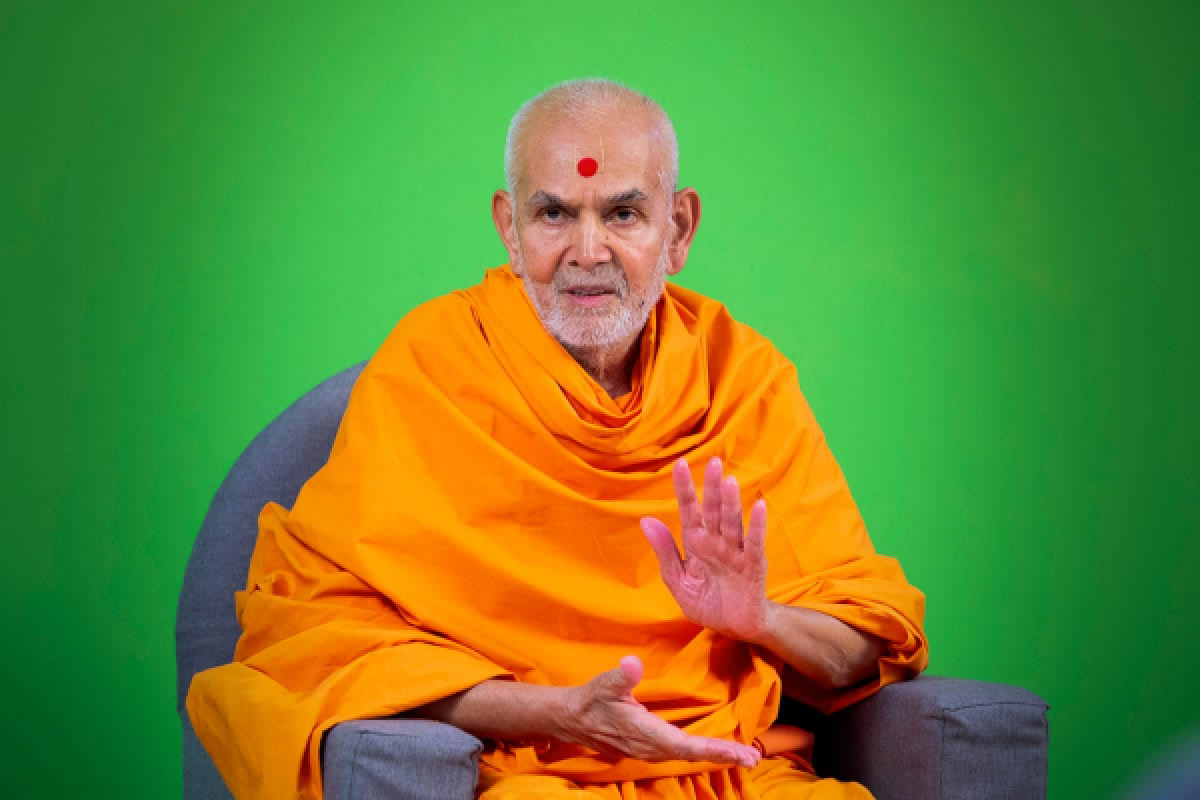

In [15]:
cv2_imshow(ht(imagec,150))

In [45]:
def st(img,threshold):   
    if img.ndim == 2:
        coeffs2 = pywt.dwt2(img, 'haar')
        LL,[LH,HL,HH] = coeffs2
        LH = LH - threshold     #decresing threshold value from all the pixel values
        HL = HL - threshold 
        HH = HH - threshold
        
        LH = LH > 0       #then the below threshold value will be already below zero so we are taking here values above 0
        HL = HL > 0
        HH = HH > 0
        tholded = LL,[LH,HL,HH]
        recon = pywt.idwt2(tholded,'haar')
        return recon
        
    if img.ndim == 3:
        final = []   #intiated to store output RGB Channels of image
        [b,g,r] = cv2.split(img)    #image split to bgr channels
      
        for f in [b,g,r]:
            coeffs2 = pywt.dwt2(f, 'haar')
            LL,[LH,HL,HH] = coeffs2
            LH = LH - threshold
            HL = HL - threshold
            HH = HH - threshold
            LH = LH > 0
            HL = HL > 0
            HH = HH > 0
            tholded = LL,[LH,HL,HH]

            recon = pywt.idwt2(tholded,'haar')

            final.append(recon)
         
        endimg = cv2.merge(final).astype('uint8')
        
        return endimg


Paper Implementation 

In [17]:

def NeighShrinq(img,var,n):   #defining function which takes image, variance value and window width as input.
    lamda = math.sqrt(2*var*var*math.log10(n**2)) #threshold
    

    if img.ndim == 2:      #for grayscale image

      coeff = pywt.dwt2(img,'haar')   #wavelet transform
      LL,[LH,HL,HH] = coeff

      final = []   #to store thresholded coeffs

      for f in [LH,HL,HH]: 
        y = np.pad(f,(n-1)//2, 'constant')     #padding the f, such that the index value out of range problem can be taken care of
        sample = f.copy()       #sample created to store thresholded pixels 
        for i in range(f.shape[0]):    #i in x dir
          for j in range(f.shape[1]):   #j in y dir
            a = i + n-1//2   #a is respective x coordinate of padded image y 
            b = j + n-1//2   #like wise b
            arr = y[a-((n-1)//2):a+((n-1)//2),b-((n-1)//2):b+((n-1)//2)]  #choosing a array of window size from y around the current pixel i,j of image f 
            arr_squared = np.square(arr)   #squared the arr.
            S = np.sum(arr_squared)  #sum of array
            beta = 1-(lamda/S)**2  #calculating beta acc to paper
            if beta > 0:   #if beta greater than 0 then the thresholded value will be....
                sample[i,j] = y[a,b]*beta
            else:
                sample[i,j] = 0  
        final.append(sample)  #storing thresholded coeffs 
        
      tholded = LL,final
      recon = pywt.idwt2(tholded,'haar')  #inverse transform
      return recon 

    if img.ndim == 3:
      ultimate = []   #intiated to store output RGB Channels of image
      [b,g,r] = cv2.split(img)    #image split to bgr channels
      
      for t in [b,g,r]:   #same process as above, one-by-one for all the channels   #0th loop
        coeff = pywt.dwt2(t,'haar') #wavelet tr
        LL,[LH,HL,HH] = coeff    
        final = []
        for f in [LH,HL,HH]:  #1st loop 
          y = np.pad(f,(n-1)//2, 'constant')
          sample = f.copy()
          for i in range(f.shape[0]):
            for j in range(f.shape[1]):
              a = i + n-1//2
              b = j + n-1//2
              arr = y[a-((n-1)//2):a+((n-1)//2),b-((n-1)//2):b+((n-1)//2)]
              arr_squared = np.square(arr)
              S = np.sum(arr_squared)
              beta = 1-(lamda/S)**2
              if beta > 0:
                  sample[i,j] = y[a,b]*beta
              else:
                  sample[i,j] = 0
          final.append(sample) 
        tholded = LL,final
        recon = pywt.idwt2(tholded,'haar')     #reconstructing the 1st loop inputs  
        ultimate.append(recon)   #storing into the input of 0th loop....rgb channels 

      endimg = cv2.merge(ultimate).astype('uint8')  #merging the rgb channels
      return endimg
       

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:22: RuntimeWarning: divide by zero encountered in double_scalars


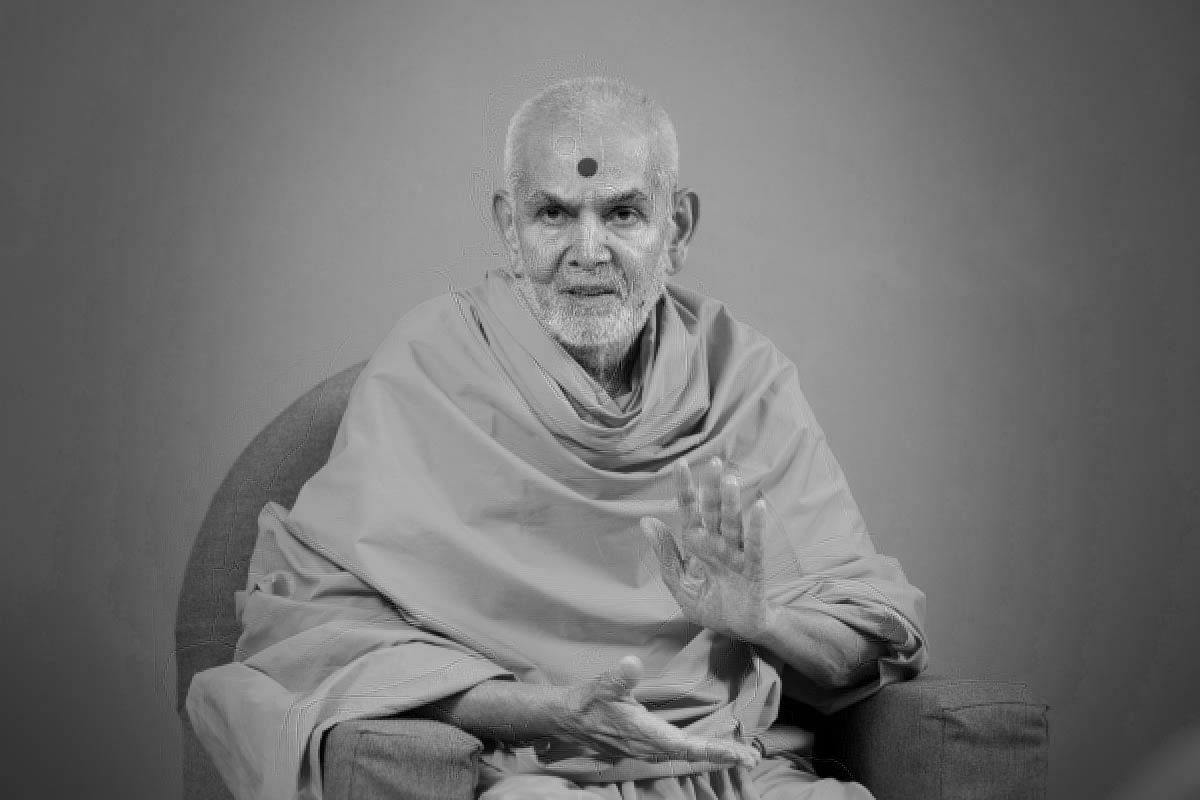

In [18]:
cv2_imshow(NeighShrinq(image,100,20))

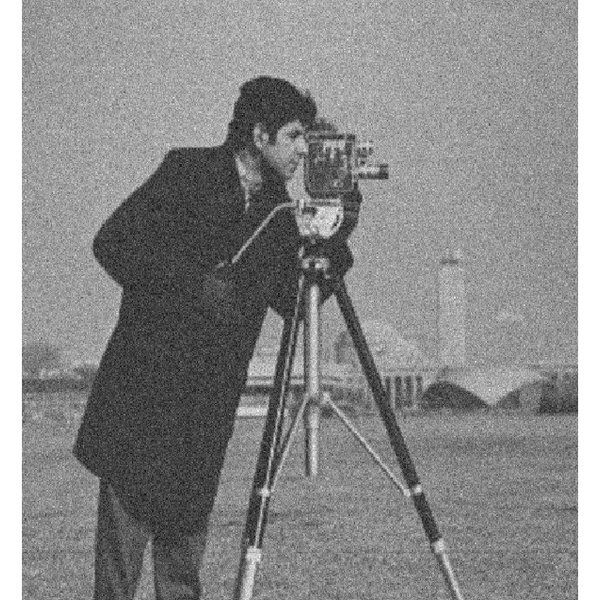

In [19]:
cv2_imshow(noisy)

# Question-3

Noise Effect on PSNR and SSIM

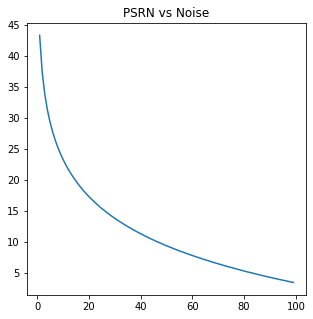

In [20]:
noise_effect = []  #y value of plot
noise_range = []   #x value of plot
for i in range(1,100):
   noise_range.append(i) 
   noise_effect.append(psnr(awgn(imagec,i),imagec))  #storing respective psnr value

plt.figure(figsize=(5,5))
plt.plot(noise_range,noise_effect)

plt.title("PSRN vs Noise")
plt.show()


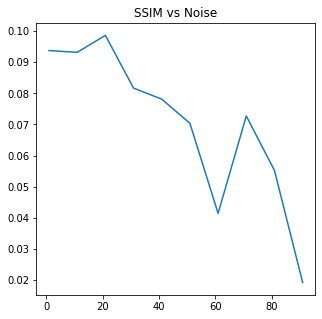

In [24]:
noise_effect_2 = []  #y value of plot
noise_range_2= []   #x value of plot
for i in range(1,100,10): #its taking too long for computation, thats why took steps of 10
   noise_range_2.append(i)
   noise_effect_2.append(ssim(awgn(imagec,i),imagec))   #storing respective ssim value

plt.figure(figsize=(5,5))
plt.plot(noise_range_2,noise_effect_2)

plt.title("SSIM vs Noise")
plt.show()

Variance Effect on PSRN and SSIM in GLPF

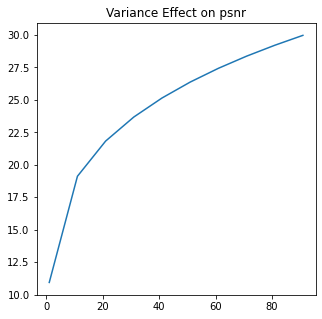

In [22]:
#for psnr
var_effect = [] #yaxis
var_range = [] #xaxis
for i in range(1,100,10):
   var_range.append(i)
   var_effect.append(psnr(glpf(imagec,i),imagec)) #storing filtered value

plt.figure(figsize=(5,5))
plt.plot(var_range,var_effect)     

plt.title("Variance Effect on psnr")
plt.show()


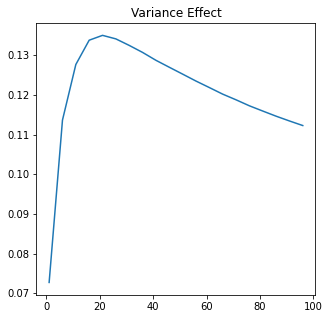

In [25]:
#for ssim
var_effect_2 = [] #yaxis
var_range_2 = [] #xaxis
for i in range(1,100,5):
   var_range_2.append(i)
   var_effect_2.append(ssim(glpf(imagec,i),imagec)) #storing filtered value

plt.figure(figsize=(5,5))
plt.plot(var_range_2,var_effect_2)

plt.title("Variance Effect")
plt.show()


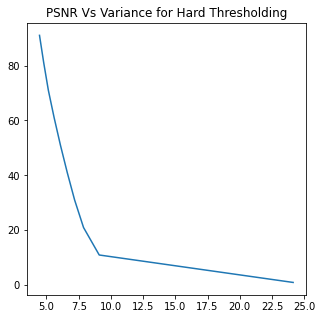

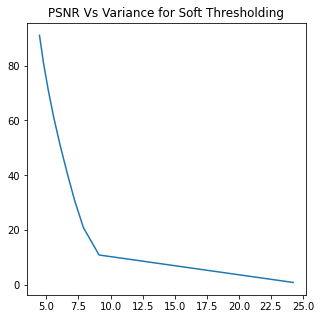

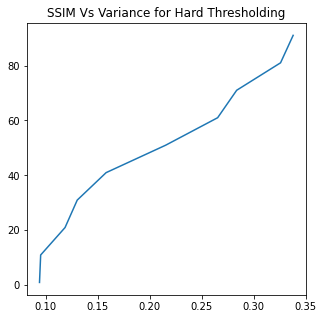

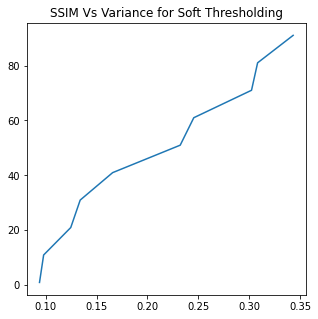

In [46]:
test = cv2.imread("/content/drive/MyDrive/EE610-Assignments/Assignment3/depositphotos_4368288-stock-photo-green-nature-landscape.jpg")
n = 5 
psnr_ht = []  #psnr list for hard thresholding of image
ssim_ht = []  #ssim list for hard thresholding of image 
variance = []  #variance list
psnr_st = [] #psnr list for soft thresholding of image
ssim_st = [] #ssim list for soft thresholding of image

for var in range(1,100,10): #var is variance actually
    t = math.sqrt(2*var*var*math.log10(n**2))  #threshold, which will vary as the variance changes 
    psnr_ht.append(psnr(ht(awgn(imagec,var),t),imagec))   #as a first arguement noise added images has taken and second is original image ...same for all below
    ssim_ht.append(ssim(ht(awgn(imagec,var),t),imagec))   
    variance.append(var)
    psnr_st.append(psnr(st(awgn(imagec,var),t),imagec))
    ssim_st.append(ssim(st(awgn(imagec,var),t),imagec))
    
plt.figure(figsize=(5,5))
plt.plot(psnr_ht,variance)
plt.title("PSNR Vs Variance for Hard Thresholding")
plt.show()

plt.figure(figsize=(5,5))
plt.plot(psnr_st,variance)
plt.title("PSNR Vs Variance for Soft Thresholding")
plt.show()

plt.figure(figsize=(5,5))
plt.plot(ssim_ht,variance)
plt.title("SSIM Vs Variance for Hard Thresholding")
plt.show()

plt.figure(figsize=(5,5))
plt.plot(ssim_st,variance)
plt.title("SSIM Vs Variance for Soft Thresholding")
plt.show()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:51: RuntimeWarning: divide by zero encountered in double_scalars


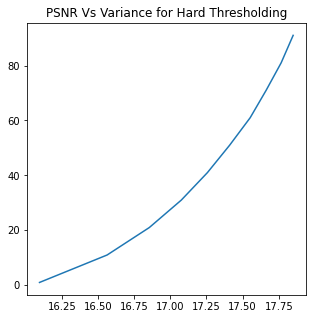

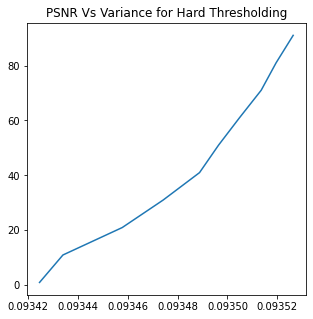

In [49]:
#research paper method implementation
psnr_rp = []
ssim_rp = []
var_rp = []
n = []
for var in range(1,100,10):
    psnr_rp.append(psnr(NeighShrinq(imagec,var,5),imagec))
    ssim_rp.append(ssim(NeighShrinq(imagec,var,5),imagec))
    var_rp.append(var)

plt.figure(figsize=(5,5))
plt.plot(psnr_rp,var_rp)
plt.title("PSNR Vs Variance for Hard Thresholding")
plt.show()

plt.figure(figsize=(5,5))
plt.plot(ssim_rp,var_rp)
plt.title("PSNR Vs Variance for Hard Thresholding")
plt.show()
  

Source:


1.   https://pywavelets.readthedocs.io/en/latest/ref/2d-dwt-and-idwt.html
2.   https://docs.scipy.org/doc/scipy/reference/signal.html
3.   https://medium.com/srm-mic/all-about-structural-similarity-index-ssim-theory-code-in-pytorch-6551b455541e#54f7
4.   https://sciencing.com/how-to-calculate-psnr-12751768.html
5.   https://www.egr.msu.edu/~aviyente/neighshrink.pdf





In [ ]:
n = int(input())
step = 0
print("Initial condition = {} {} {}".format([i for i in range(n,0,-1)], [], []))
def TOH(n, i = 'A', j = 'B', k = 'C', v = {'A': [i for i in range(n,0,-1)], 'B': [], 'C': []}):
  global step
  if n == 1:
    v[j].append(v[i].pop())
    step += 1
    print("Step {} = {} {} {}".format(step, v['A'], v['B'], v['C']))
    return
  TOH(n-1, i, k, j) 
  v[j].append(v[i].pop())
  step += 1
  print("Step {} = {} {} {}".format(step, v['A'], v['B'], v['C']))
  TOH(n-1, k, j, i) 
TOH(n)


www.egr.msu.edu/~aviyente/neighshrink.pdf